# Milestone 1
## 1. Introduction
`Fachmi Maris`

Batch 002

the dataset used is `ml_datasets` from a database named `credit_card_default`.
## Source : 
SELECT 
limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 3990

The above query is fetched and saved in the `.csv` file format which is saved with the name `h8dsft_P1M1_Fachmi_Maris.csv`.

### OBJECTIVES
Milestones 1 was created to evaluate Phase 1 Learning in the Supervised Learning concept as follows:

- Able to obtain data using BigQuery
- Able to understand the concept of supervised learning
- Able to prepare data for use in supervised learning models
- Able to implement supervised learning with the data provided
- Able to do model evaluation
- Able to do model tuning

### PROBLEM STATEMENT
Create a Classification model to predict default_payment_next_month using the saved dataset.

## 2.Import Library

In [1]:
# Define Librearies
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


#For Classifer Problem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

#Split Dataset and Standarize Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For Selection Features
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest

#Evaluate Regression Models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,confusion_matrix 

#Error and Display Setting
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows',100)
import warnings
warnings.filterwarnings('ignore')



The cell above contains the libraries that are called and needed in this study which consist of 6 groups:
1. Define Libraries
2. For Classifer Problem
3. Split Dataset and Standardize Dataset
4. For Selection Features
5. Evaluate Regression Models
6. Error and Display Settings


## 3.Data Loading

Loading dataset into Visual Studio Code

In [2]:
df = pd.read_csv('h8dsft_P1M1_Fachmi_Maris.csv..csv')

The above step is to call and read the dataset taken from the bigquery source listed as in the source.

In [3]:
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0
3,200000,1,1,1,58,0,0,0,0,0,0,192461,195970,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
4,500000,1,1,1,39,0,0,0,0,0,0,133598,167378,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000,2,3,1,39,-1,-1,-1,-1,-2,-1,5280,5000,5000,0,0,5000,5000,5000,0,5000,5000,470,0
2961,110000,2,2,2,24,-1,-1,-1,-1,0,0,1362,1352,1867,36986,40053,41196,1352,1867,36986,5000,3000,23000,0
2962,160000,2,1,2,32,-1,-1,-1,-1,-1,-1,9441,5714,5030,3181,4998,1250,5726,5037,3182,5000,1252,749,0
2963,210000,2,1,1,38,0,0,-1,-1,0,0,8420,8106,4168,23067,19972,45864,3000,4521,24000,10000,30000,6432,0


displays a dataframe with the variable name df

There are 24 variables:

- `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- `SEX`: Gender (1=male, 2=female)
- `education_level`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknow, 0=unknown)
- `marital_status`: Marital status (1=married, 2=single, 3=others)
- `age`: Age in years
- `PAY_0`: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two
- months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- `PAY_2`: Repayment status in August, 2005 (scale same as above)
- `PAY_3`: Repayment status in July, 2005 (scale same as above)
- `PAY_4`: Repayment status in June, 2005 (scale same as above)
- `PAY_5`: Repayment status in May, 2005 (scale same as above)
- `PAY_6`: Repayment status in April, 2005 (scale same as above)
- `BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)
- `BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)
- `BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)
- `BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)
- `BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)
- `BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)
- `PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)
- `PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)
- `PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)
- `PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)
- `PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)
- `PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)
- `default.payment.next.month`: Default payment (1=yes, 0=no)

Based on the description of the dataset columns, we can conclude that the dataset discusses credit cards in Taiwan because the dataset states that the currency is NT dollars (Taiwanese Dollars). The goal of this project is that the researcher wants to predict the next user's default payment within the next month.
Based on the existing dataset, the researcher realizes that there are some things that are awkward and worth handling in an appropriate way, such as:
1. In the `education_level` column there are unique 0, 5, and 6 which have an unknown meaning, so the unique will be combined with unique 4

2. The column name `Pay_0` will be renamed to `Pay_1` because the researcher assumes that the dataset author may have made a typo or typo.

3. In column `Marital_status` found unique 0 whose definition is unknown so it will be combined with unique 3.

4. `default.payment.next.month` consists of 0=no, 1=yes.
- class 0 is a client with smooth payments, which means that the client is still able to fulfill their debt payment obligations
- Class 1 is a client with delinquent payments which means the client is unable to fulfill their debt payment obligations.

In [4]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0
3,200000,1,1,1,58,0,0,0,0,0,0,192461,195970,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
4,500000,1,1,1,39,0,0,0,0,0,0,133598,167378,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509,0


show df.head() to display the top 5 rows in the dataset.

In [5]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,80000,2,3,1,39,-1,-1,-1,-1,-2,-1,5280,5000,5000,0,0,5000,5000,5000,0,5000,5000,470,0
2961,110000,2,2,2,24,-1,-1,-1,-1,0,0,1362,1352,1867,36986,40053,41196,1352,1867,36986,5000,3000,23000,0
2962,160000,2,1,2,32,-1,-1,-1,-1,-1,-1,9441,5714,5030,3181,4998,1250,5726,5037,3182,5000,1252,749,0
2963,210000,2,1,1,38,0,0,-1,-1,0,0,8420,8106,4168,23067,19972,45864,3000,4521,24000,10000,30000,6432,0
2964,360000,2,2,1,37,-1,-1,0,-1,-1,-1,10000,17444,17165,10000,10000,10000,17444,10035,10000,10000,10000,0,0


show df.head() to display the bottom 5 rows in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Based on the data above, all data are integer. each column consists of 2965 rows and 24 columns of data. It is known that in the dataset in each column there is no missing value, this can be seen from the number of non-null columns in each column of the dataset which is the same as the number of data entries.

In [7]:
df[df.duplicated()].shape

(1, 24)

There is 1 duplicate data line that will be deleted because the data is just a repetition which may occur due to technical errors in data input

In [8]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Looking for missing values in each row and column of data then looking for a lot and the result is that there are no missing values in the dataset.

In [9]:
df.shape

(2965, 24)

Based on df.shape, it displays the initial dataset before data cleaning is carried out based on the number of rows and columns. The number of rows in df is 2965 rows and 24 columns.

In [10]:
numerical = ['limit_balance','age','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']
categorical = ['sex','education_level', 'marital_status','pay_0','pay_2','pay_3','pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']

Based on Separating data based on numerical and categorical data. then give it a numeric and category variable name

In [11]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
bill_amt_1,2965.0,52118.305228,72328.670541,-11545.0,3958.0,24257.0,69852.0,613860.0
bill_amt_2,2965.0,50649.153120,70785.001588,-67526.0,3390.0,23111.0,67827.0,512650.0
bill_amt_3,2965.0,48239.757504,68145.710745,-25443.0,3302.0,21520.0,63023.0,578971.0
bill_amt_4,2965.0,44089.683305,61907.454056,-46627.0,2582.0,19894.0,58622.0,488808.0
bill_amt_5,2965.0,40956.080607,58271.904751,-46627.0,1958.0,18814.0,53373.0,441981.0
bill_amt_6,2965.0,39773.072513,57303.488981,-73895.0,1430.0,18508.0,52287.0,436172.0
pay_amt_1,2965.0,6348.902867,20885.735336,0.0,1013.0,2234.0,5087.0,493358.0
pay_amt_2,2965.0,6272.494435,28879.674534,0.0,990.0,2175.0,5000.0,1227082.0


Displays the display of the describe function in transpose form to see simple statistical data processing. Based on the results described above, it is known that there are no oddities in the numeric data, such as missing data values 99999 etc., so that they can be processed to the next stage

In [12]:
for i in categorical:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

sex

2    1802
1    1163
Name: sex, dtype: int64
----------
education_level

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64
----------
marital_status

2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64
----------
pay_0

 0    1516
-1     540
 1     356
 2     262
-2     247
 3      29
 4       7
 8       3
 5       2
 7       2
 6       1
Name: pay_0, dtype: int64
----------
pay_2

 0    1607
-1     580
 2     374
-2     353
 3      32
 4       8
 1       4
 7       3
 5       2
 6       2
Name: pay_2, dtype: int64
----------
pay_3

 0    1610
-1     580
 2     368
-2     367
 3      22
 4       8
 6       4
 5       3
 7       3
Name: pay_3, dtype: int64
----------
pay_4

 0    1667
-1     532
-2     408
 2     324
 3      14
 4       7
 7       6
 5       5
 6       1
 8       1
Name: pay_4, dtype: int64
----------
pay_5

 0    1702
-1     504
-2     441
 2     280
 3      19
 4       9
 7       7
 5  

View the results of the function to see the number of unique data contained in each categorical column.

Based on the initial review, the following information was obtained:
- there are duplicated data
- there are no missing values
- there are columns in the form of numerical and categorical data even though they are in the form of numbers

### Data Cleaning

In [13]:
#duplicated data
df_clean = df.copy()
df_clean.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1


Duplicate df to df_clean so as not to change the dataset at the start

In [14]:
df_clean[df_clean.duplicated()].shape

(1, 24)

Removing duplicate data because it is considered to provide excess information.

In [15]:
df_clean.drop_duplicates(inplace=True)

df_clean[df_clean.duplicated()].shape

(0, 24)

### Rename column pay_0 to pay_1

In [16]:
df_clean.rename(columns={'pay_0' : 'pay_1'},inplace=True)

### Doing a replace for the data in the education_level and marital status columns

### FE education_level

In [17]:
df_clean['education_level']=df_clean['education_level'].replace({ 5 : 4 , 6 : 4 ,0: 4})
df_clean['education_level'].value_counts()

2    1400
1    1038
3     483
4      43
Name: education_level, dtype: int64

### FE marital_status

In [18]:
df_clean['marital_status'].unique()

array([1, 2, 3, 0], dtype=int64)

In [19]:
df_clean['marital_status']=df_clean['marital_status'].replace({ 0: 3})
df_clean['marital_status'].value_counts()

2    1594
1    1331
3      39
Name: marital_status, dtype: int64

### FE pay_1, - pay_6

In [20]:
df_clean[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]=df_clean[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].replace({ -2: -1})
df_clean[['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].value_counts()

pay_1  pay_2  pay_3  pay_4  pay_5  pay_6
 0      0      0      0      0      0       992
-1     -1     -1     -1     -1     -1       467
 1     -1     -1     -1     -1     -1       125
 0      0      0      0      0     -1        64
 2      2      2      2      2      2        53
                                           ... 
 1      2     -1     -1     -1      0         1
                             0      0         1
                      0      0      0         1
                      2      0      0         1
       -1     -1     -1      2     -1         1
Length: 286, dtype: int64

The process carried out in the several stages above is as follows:
- make a copy of the data so that the initial data does not change
- drop duplicated data
- Changed column name pay_0 to pay_1
- In the education_level column, the unique values 0, 5, and 6 are changed to the value 4
- In the marital_status column, the unique value 0 is changed to 3
- In the pay_1 to pay_6 columns, combine the values -2 into -1. Replace the data in the education_level and marital status columns

## 4.Exploratory Data Analysis (EDA)


In [21]:
df_clean.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1


In [22]:
df_clean['default_payment_next_month'].value_counts().reset_index()

,index,default_payment_next_month
0,0,2329
1,1,635


<AxesSubplot:>

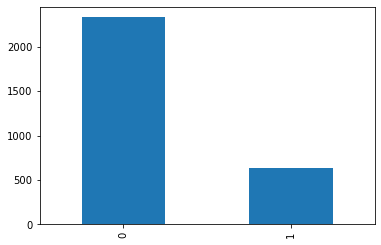

In [23]:
df_clean['default_payment_next_month'].value_counts().plot(kind = 'bar')

Displays a barplot visualization of the number of current paying clients which means clients are still able to fulfill their debt payment obligations (class 0) and the number of delinquent payment clients which means clients are unable to fulfill their debt payment obligations (class 1). The number of clients in class 0 is 2329 people and the number of clients in class 1 is 635. Because the comparison of the numbers is too far apart, this dataset can be expressed as imbalance data.

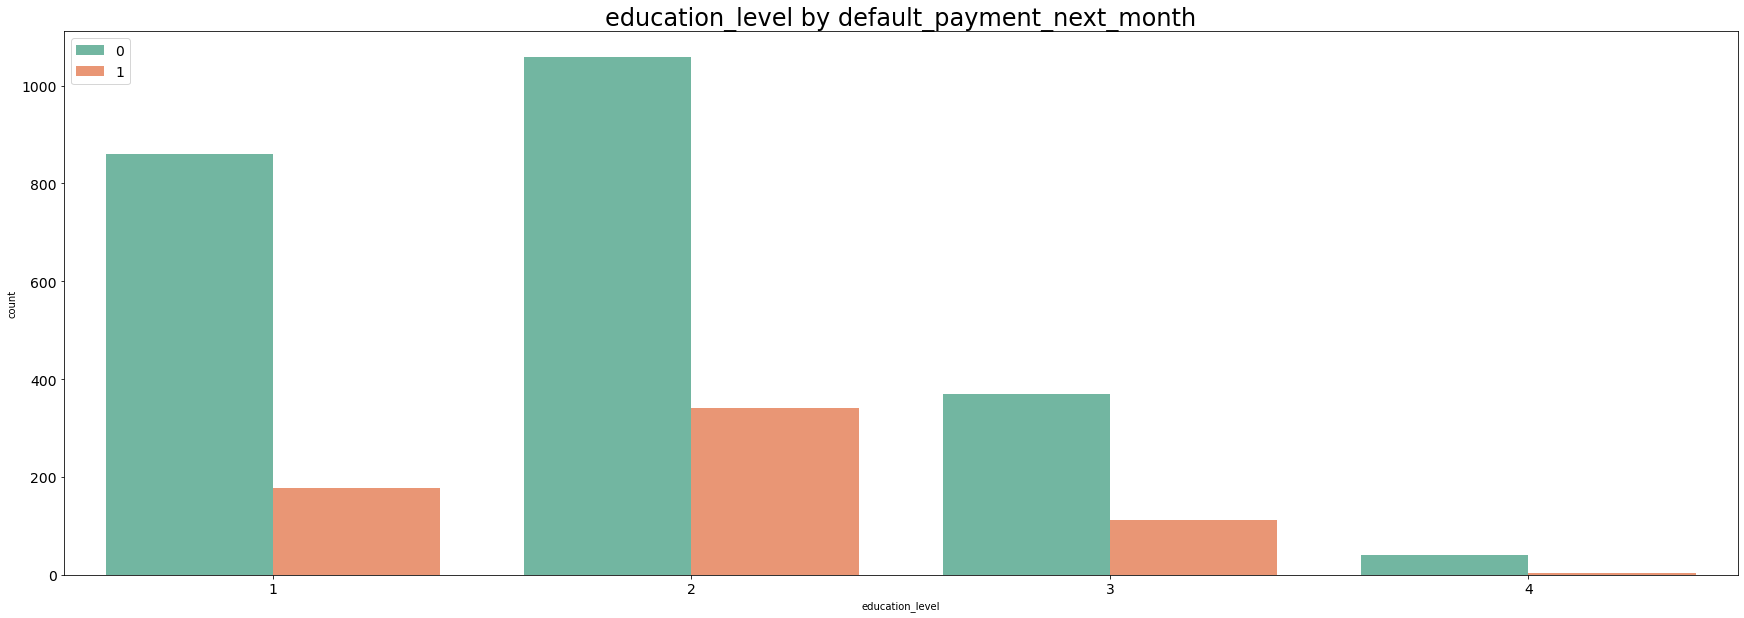

In [24]:
plt.figure(figsize = (30,10))
plt.title('education_level by default_payment_next_month', fontsize=24)
sns.countplot(data=df_clean.sort_values(by='education_level'), x='education_level', hue='default_payment_next_month', palette="Set2")
plt.xticks( fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=2, fontsize=14)
plt.show()

Displays a visualization based on the number of clients who are in class 0 or class 1 with the client's education level.

<AxesSubplot:xlabel='default_payment_next_month', ylabel='age'>

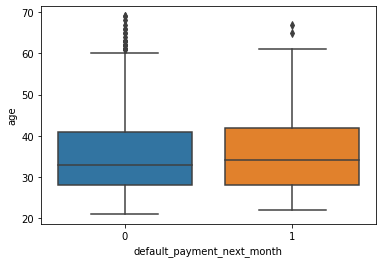

In [25]:
sns.boxplot(data=df_clean, x='default_payment_next_month', y='age')

Displays a boxplot visualization of the client's age range based on class 0 or class 1 targets. From the boxplot results above between age and default_payment_next_month, information is obtained that visually there are outliers, but it needs to be tested whether they are true outliers or not at a later stage

In [26]:
df_clean['sex'].value_counts().reset_index()

,index,sex
0,2,1801
1,1,1163


<AxesSubplot:ylabel='sex'>

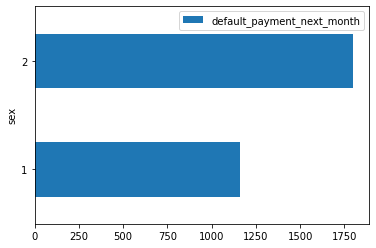

In [27]:
df_clean.groupby('sex')[['default_payment_next_month']].count().sort_values('default_payment_next_month').plot(kind='barh')

Displays a visualization of clients entering class 0 or class 1 based on gender.

EDA for analysis is carried out for simple data analysis with the aim of seeing the relationship between several columns. The following are the results of the EDA for analysis:
1. Find out the comparison between class 0 and class 1 (1=yes, 0=no) in the column `default_payment_next_month`. The result is:
- class 0 is a client with smooth payments, which means that the client is still able to fulfill their debt payment obligations
- class 1 is a client with bad payments which means the client is unable to fulfill their debt payment obligations.
- The number of clients in class 0 is 2325 people and the number of clients in class 1 is 634 people. Because the comparison of the numbers is too far apart, this dataset can be declared as an imbalance.

2. `education_level` to `default_payment_next_month`: clients with grade 2 or university education levels have the highest number compared to other education levels.

3. `age` to `default_payment_next_month` : the boxplot shown shows the age range of clients using credit cards. Generally credit card users in Taiwan are around the age of 30 to around 40 years old.

4. `sex` against `default_payment_next_month` : displays comparison of credit card users based on gender. The number of female clients is 1800 people and the number of male clients is 1159 people. The number of female clients is more than the number of male clients.

#### Split data into Train, Test and Inference

In [28]:
inference = df_clean.sample(5, random_state=17)
inference

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
91,180000,1,1,1,35,0,0,0,0,0,0,170128,172258,138807,132806,135603,137803,7187,5000,4749,5141,4916,4000,0
325,20000,1,3,2,38,0,0,0,0,0,0,18878,19286,18977,18335,18718,18475,1318,1289,647,669,664,682,0
47,240000,1,1,1,35,0,0,0,0,0,0,188964,183744,168683,155064,148969,148619,8000,6017,6900,5250,5400,6200,0
2848,240000,2,2,2,30,-1,-1,0,-1,-1,-1,4684,18412,16580,416,416,416,18432,1416,16580,416,416,416,1
446,150000,1,2,1,41,0,0,0,0,0,0,19350,20703,10403,10927,11598,13235,2000,3000,1000,1000,2000,2000,0


Setting up data inference from df_clean. data inference is data that represents data from the real world. This data inference will be used in model inference which aims to test the model that has been made to work or not when new data is entered besides train data and test data

In [29]:
df_clean = df_clean.drop(inference.index)

Separate data inference from variable data df_clean.

In [30]:
df_clean.shape

(2959, 24)

After the data inference is separated, df_clean is reduced to 2959 rows and 24 columns.

In [31]:
df_clean.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1


Displays the top 2 rows from df_clean.

In [32]:
X = df_clean.drop('default_payment_next_month', axis=1)
y = df_clean['default_payment_next_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2219, 23)
(740, 23)
(2219,)
(740,)


Dividing the data from the df_clean variable into 4 parts, namely X_train, X_test, y_train, and y_test.

In [33]:
df_eda = pd.concat([X_train, y_train], axis=1)
testing = pd.concat([X_test, y_test], axis=1)

df_eda.shape

(2219, 24)

>Combine X_train and y_train into data train with df_eda variable.

>Combine X_test and y_test into test data with variable testing.

The process of dividing data into 3 dataframes, namely:
- Inference data that will be used for model testing after the model evaluation is 5 sample data
- data train with a magnitude of 75% of the data
- test data with a magnitude of 25% of the data

The determination of the target column and feature column is written with y for the target and x for the feature

### EDA FOR MODELING

In [34]:
df_eda.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
291,280000,1,1,2,33,0,0,0,0,0,0,281604,283292,281327,189287,185398,184414,10000,10059,5201,5211,5500,5500,0
1948,20000,2,2,2,21,-1,-1,2,2,-1,-1,390,780,780,0,0,0,780,0,0,0,0,0,0


In [35]:
num = ['limit_balance','age','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']
cat = ['sex','education_level', 'marital_status','pay_1','pay_2','pay_3','pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']

Inserts numeric columns into the `num` variable and categorical columns into the `cat` variable. The goal is to simplify the next process.

#### Numerical feature

In [36]:
df_eda[num].head(2)

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
291,280000,33,281604,283292,281327,189287,185398,184414,10000,10059,5201,5211,5500,5500
1948,20000,21,390,780,780,0,0,0,780,0,0,0,0,0


### View data distribution based on Skewness

In [37]:
skew = df_eda[num].skew()
skewness = pd.DataFrame(skew)
skewness

,0
limit_balance,1.008381
age,0.767315
bill_amt_1,2.463961
bill_amt_2,2.449454
bill_amt_3,2.484027
bill_amt_4,2.419083
bill_amt_5,2.343106
bill_amt_6,2.414749
pay_amt_1,12.436595
pay_amt_2,27.789428


Calculates the skewness value based on the numeric columns to review whether the distribution of the data is normal distribution or abnormal distribution.

In [38]:
skewness.columns =['value']

In [39]:
skewness['distribusi']=0
for i in skewness.index:
  if (skewness["value"][i]>= -0.5) & (skewness["value"][i] <= 0.5):
    skewness["distribusi"][i]='distribusi normal'
  else:
    skewness["distribusi"][i]='distribusi tidak normal'
skewness

,value,distribusi
limit_balance,1.008381,distribusi tidak normal
age,0.767315,distribusi tidak normal
bill_amt_1,2.463961,distribusi tidak normal
bill_amt_2,2.449454,distribusi tidak normal
bill_amt_3,2.484027,distribusi tidak normal
bill_amt_4,2.419083,distribusi tidak normal
bill_amt_5,2.343106,distribusi tidak normal
bill_amt_6,2.414749,distribusi tidak normal
pay_amt_1,12.436595,distribusi tidak normal
pay_amt_2,27.789428,distribusi tidak normal


Based on the calculation of the skewness value, it can be seen that all numerical columns have an abnormal distribution because the skewness value is above 0.5.

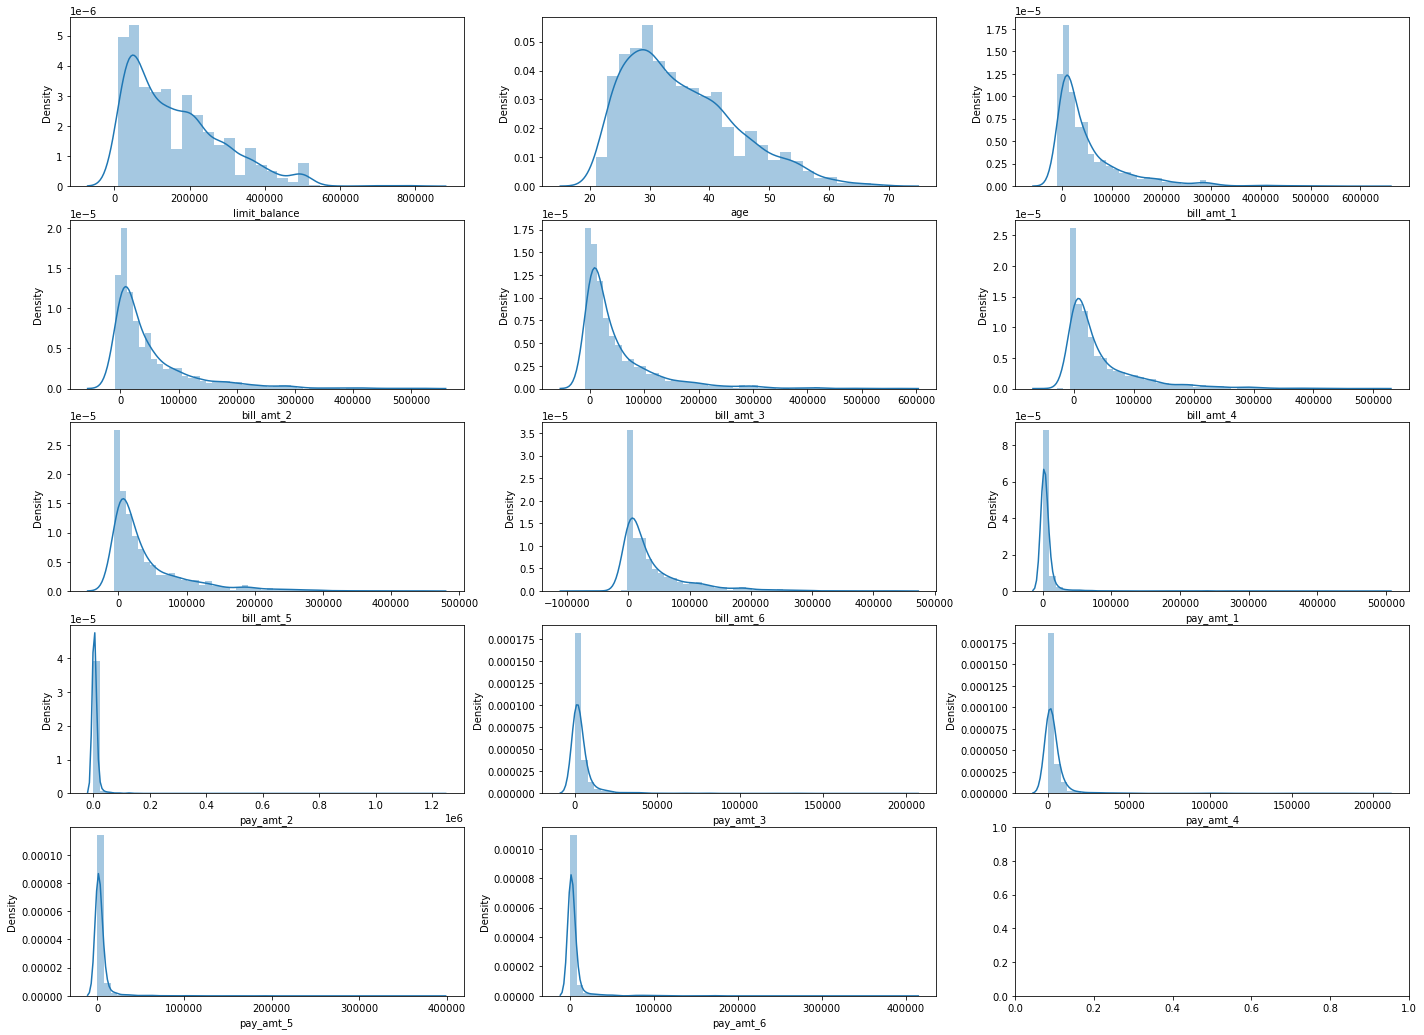

In [40]:
fig, ax = plt.subplots(ncols=3,nrows=5,figsize=(24,18))
x=0
for i in range(5):
  for j in range(3):
    try:
      sns.distplot(df_eda[num[x]],ax=ax[i][j])
      x+=1
    except:
      pass
plt.show()

Visualization display of numerical distribution of data

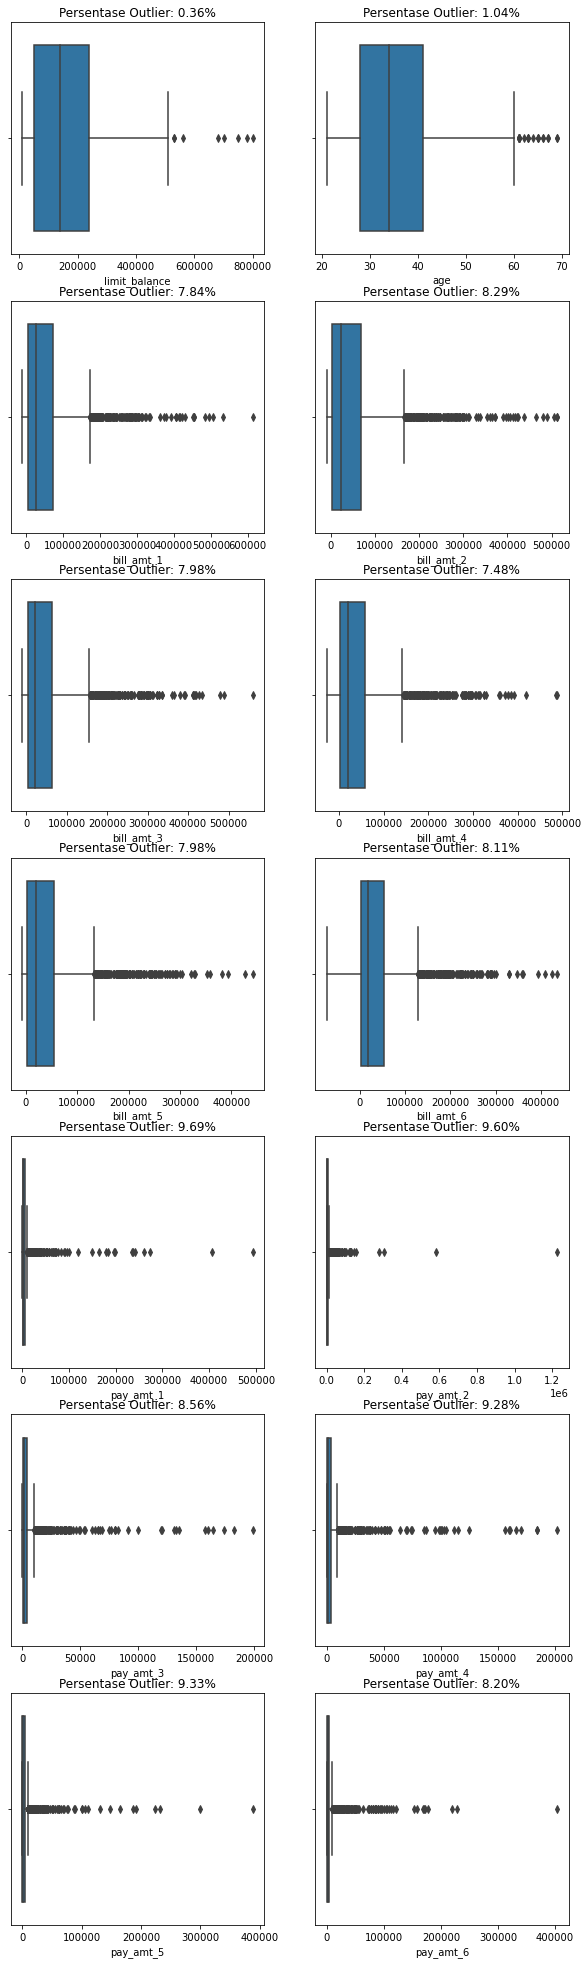

In [109]:
def outlier_analysis(df_eda,col):
  skewness = df_eda[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df_eda[col].mean() + 3*df_eda[col].std()
    lower = df_eda[col].mean() - 3*df_eda[col].std()
  else:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
  
  no_outliers = df_eda[(df_eda[col]>=lower) & (df_eda[col]<=upper)]
  outliers = df_eda[(df_eda[col]<lower) | (df_eda[col]>upper)]

  return outliers,no_outliers, upper, lower

fig, ax = plt.subplots(ncols=2,nrows=7,figsize=(10,35))
x=0
for i in range(7):
  for j in range(2):
    try:
      out,no_out, up, low = outlier_analysis(df_eda,num[x])
      sns.boxplot(df_eda[num[x]],ax=ax[i][j])
      ax[i][j].set_title('Persentase Outlier: {:.2f}%'.format(len(out)*100/len(df_eda)))
      x+=1
    except:
      pass
plt.show()

Displays outlier visualization in each numeric column. The boxplot graph above is a graph on the numeric data column, from the boxplot results there are many outliers in each numeric column and you can see the number of outliers with a percentage.

The average percentage of outliers is above 7% in every numerical column except the `limit_balance` and `age` columns. Outlier handling is done by capping method using winsorizer. The capping winsorizer functions to cap the testing and inference data at the modeling stage.

The `age` column is not appropriate for outlier handling because capping it will destroy the original age range. for example the highest age in this dataset is 69 years old, if capping is done it will be 65 years old. This is considered to be unreasonable.

### Handling Outlier

In [42]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['limit_balance'])

df_eda_cleaned = wins.fit_transform(df_eda)

The code above is a way to cap outliers using the `iqr` capping method. Column `limit_balance` data is not normally distributed based on its skewness value so it is feasible to handle outliers.

In [43]:
df_eda_cleaned.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
291,280000.0,1,1,2,33,0,0,0,0,0,0,281604,283292,281327,189287,185398,184414,10000,10059,5201,5211,5500,5500,0
1948,20000.0,2,2,2,21,-1,-1,2,2,-1,-1,390,780,780,0,0,0,780,0,0,0,0,0,0


In [44]:
print('before handling: \n', df_eda[num].describe())

before handling: 
        limit_balance          age     bill_amt_1     bill_amt_2  \
count    2219.000000  2219.000000    2219.000000    2219.000000   
mean   163132.041460    35.269941   53503.124831   51813.631816   
std    126038.217385     9.194406   74376.813993   72540.902331   
min     10000.000000    21.000000  -11545.000000   -9850.000000   
25%     50000.000000    28.000000    4213.500000    3495.500000   
50%    140000.000000    34.000000   24685.000000   23227.000000   
75%    240000.000000    41.000000   70971.500000   68659.500000   
max    800000.000000    69.000000  613860.000000  512650.000000   

          bill_amt_3     bill_amt_4     bill_amt_5     bill_amt_6  \
count    2219.000000    2219.000000    2219.000000    2219.000000   
mean    49395.924290   44740.687247   41597.407841   40269.188824   
std     69458.227958   63103.820099   59138.951234   58036.743006   
min     -9850.000000  -27490.000000   -7220.000000  -73895.000000   
25%      3551.000000    2712.000

In [45]:
print('after handling: \n', df_eda_cleaned[num].describe())

after handling: 
        limit_balance          age     bill_amt_1     bill_amt_2  \
count    2219.000000  2219.000000    2219.000000    2219.000000   
mean   162622.803064    35.269941   53503.124831   51813.631816   
std    124117.689151     9.194406   74376.813993   72540.902331   
min     10000.000000    21.000000  -11545.000000   -9850.000000   
25%     50000.000000    28.000000    4213.500000    3495.500000   
50%    140000.000000    34.000000   24685.000000   23227.000000   
75%    240000.000000    41.000000   70971.500000   68659.500000   
max    525000.000000    69.000000  613860.000000  512650.000000   

          bill_amt_3     bill_amt_4     bill_amt_5     bill_amt_6  \
count    2219.000000    2219.000000    2219.000000    2219.000000   
mean    49395.924290   44740.687247   41597.407841   40269.188824   
std     69458.227958   63103.820099   59138.951234   58036.743006   
min     -9850.000000  -27490.000000   -7220.000000  -73895.000000   
25%      3551.000000    2712.0000

> After capping, we can see the difference between before and after capping. From the results above, you can see the difference in the `limit_balance` column after and before capping, this means that the capping in the `limit_balance` column was successfully carried out.

#### Categorical Feature

In [46]:
df_cat = df_eda[cat]

df_cat.head()

,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
291,1,1,2,0,0,0,0,0,0,0
1948,2,2,2,-1,-1,2,2,-1,-1,0
2482,1,1,1,-1,-1,-1,-1,-1,-1,0
1269,2,2,3,1,-1,-1,0,0,0,0
2918,2,1,2,-1,-1,-1,-1,0,0,0


The process carried out in EDA for Modeling:
Dividing data into two dataframes, because the treatment to be applied will differ according to the data type
1. Numerical Features
- calculate the skewness value which will then be used to detect and handle outliers
- calculating distribution comparisons and abnormal distributions to determine handling outliers
- display plot distribution to see distribution. From the comparison of skewness in each column, the data results will be handled using iqr (not normal distribution)
- Handling outliers in the `limit_balance` column

2. Categorical Features
- There is no treatment whatsoever for categorical features because the data is already in the form of numbers which represent meaning

#### Feature Selection

#### Feature Selection For Numerical

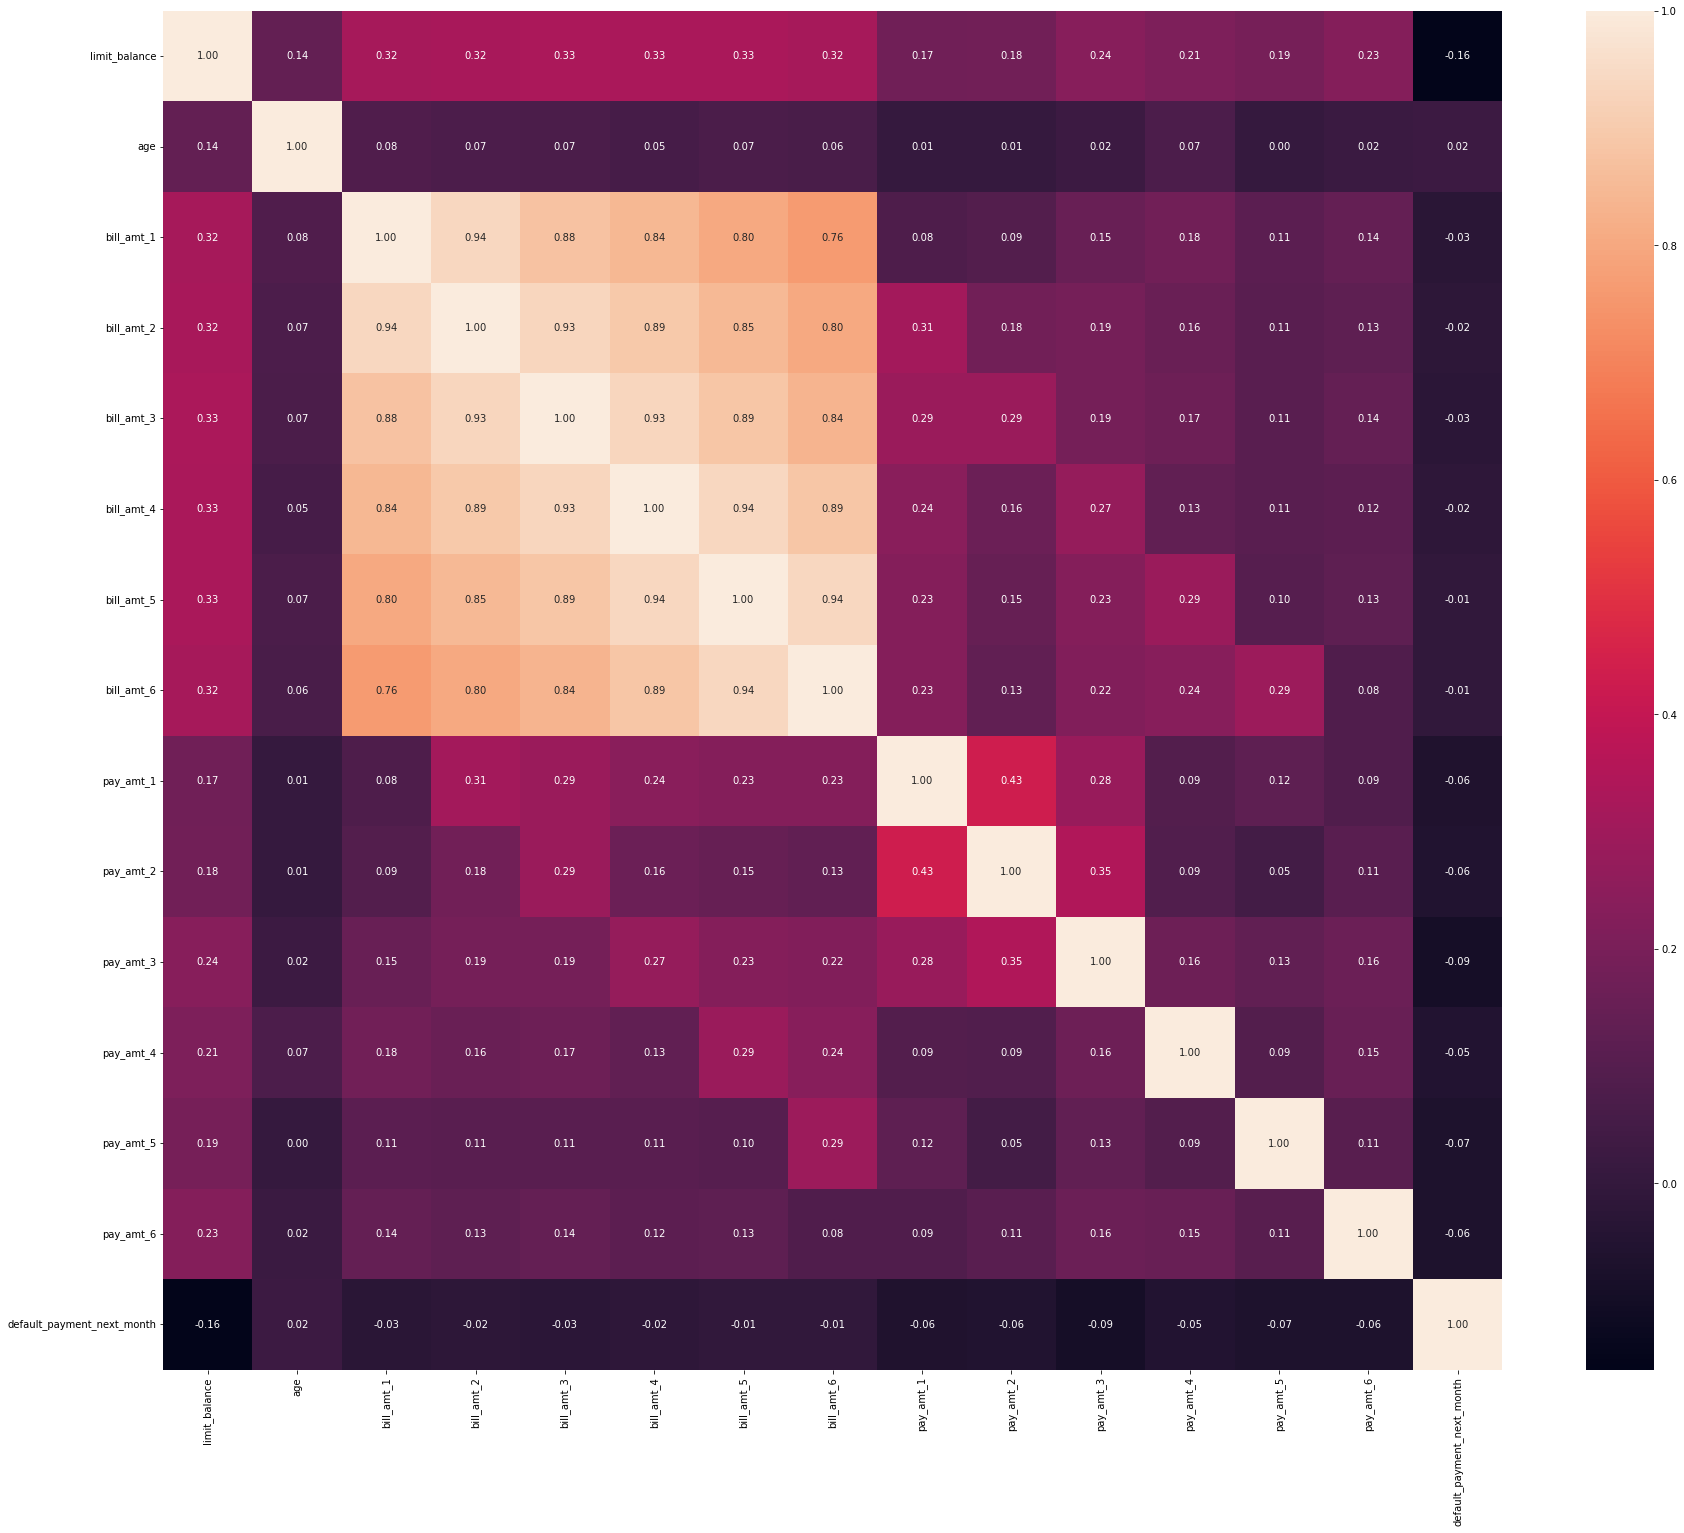

In [47]:
plt.figure(figsize=(30,25))
sns.heatmap(df_eda[num+["default_payment_next_month"]].corr(), annot=True, fmt='.2f')
plt.show()

Based on the heatmap visualization results above, it can be concluded that only the `limit_balance` column has the highest correlation compared to the other numerical columns and has a correlation value above 0.1. Researchers only take features that have a correlation value above 0.1 to be used as a feature.

#### Feature Selection For Categorycal

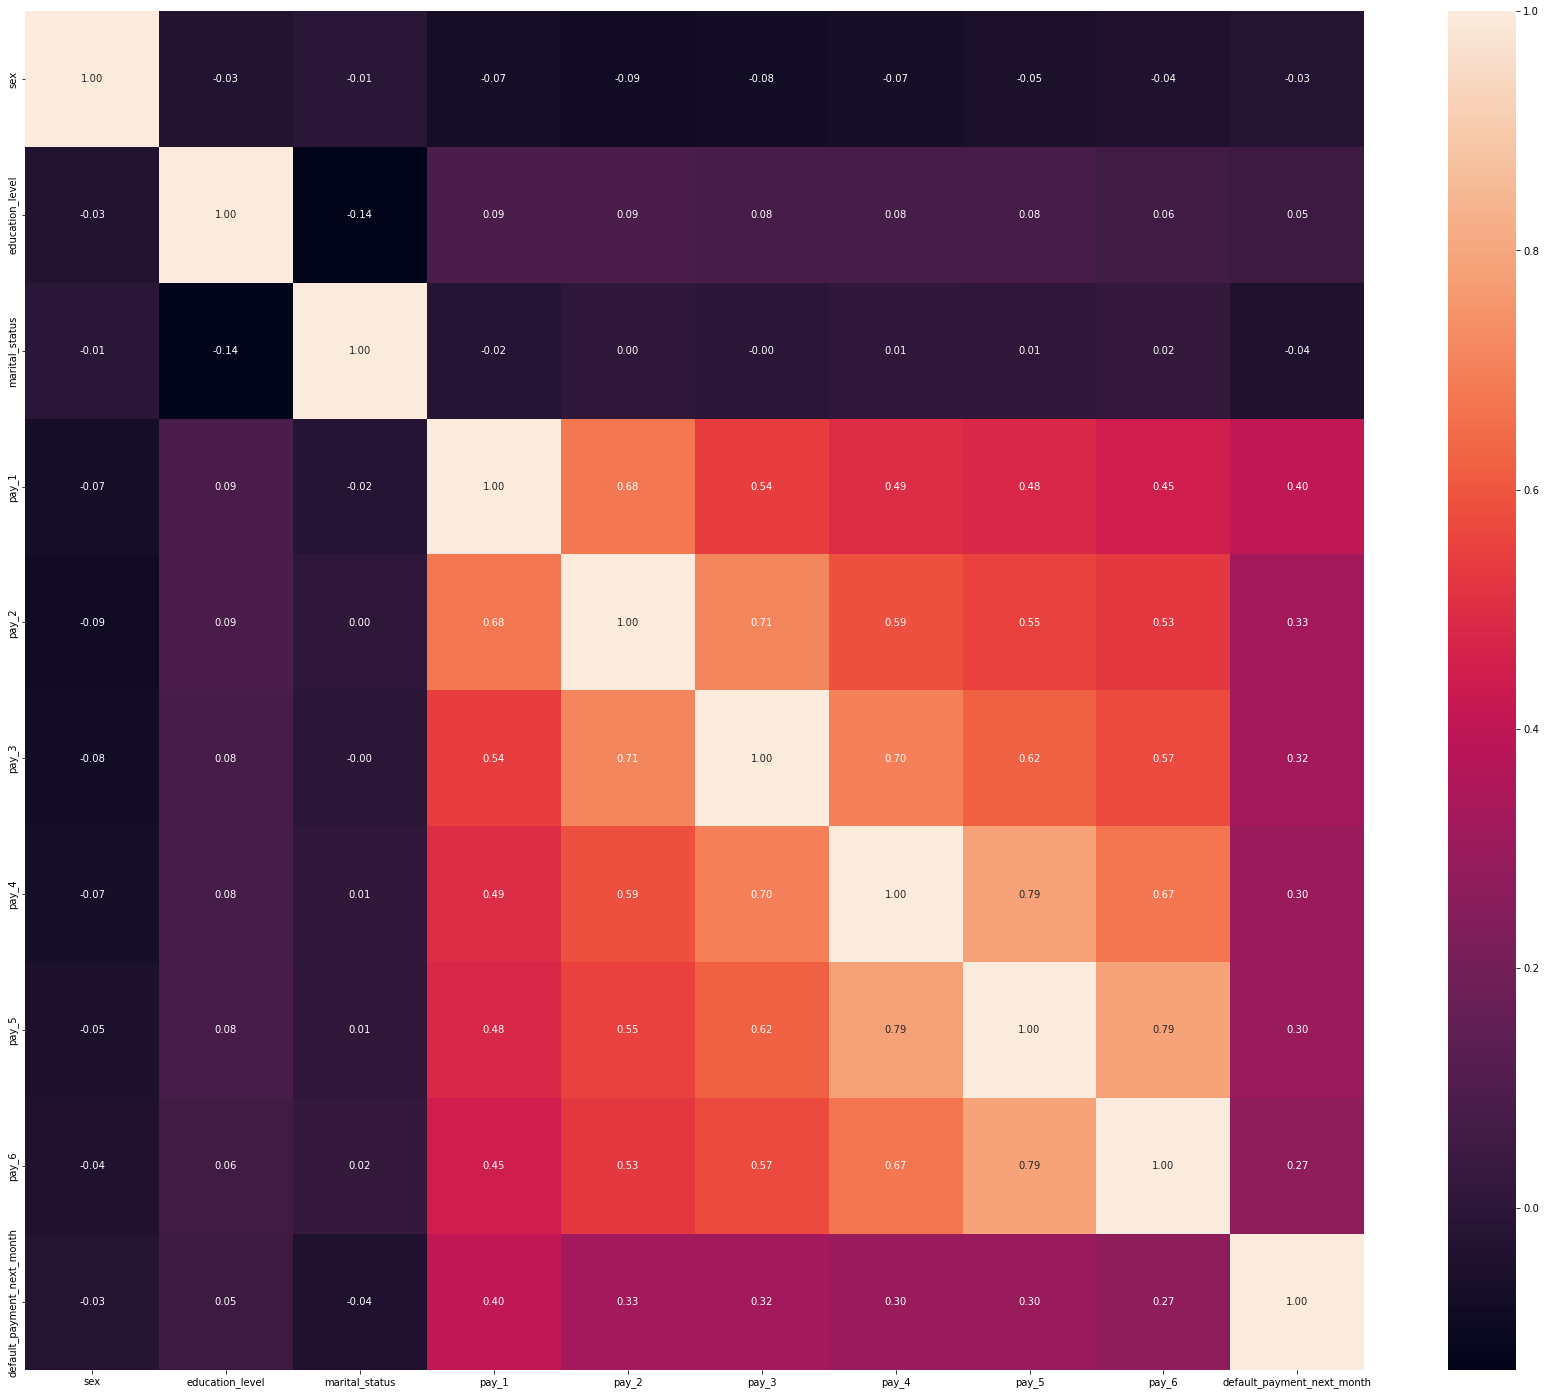

In [48]:
plt.figure(figsize=(30,25))
sns.heatmap(df_eda[cat].corr(), annot=True, fmt='.2f')
plt.show()

Based on the heatmap above for the categorical column then:
1. sex
2. education_level
3. marital_status
otherwise the correlation value with the target is very low because the displayed value is close to 0

For pay_1 to pay_6 a multicorrelation test will be carried out to check whether each column is related to each other based on the VIF value

#### Cek Multicollinearity

In [49]:
#Cek Multicollinearity
df_pay=df_eda[['pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6']]

vif_data = pd.DataFrame()
vif_data["feature"] = df_pay.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_pay.values, i) for i in range(len(df_pay.columns))]

vif_data

,feature,VIF
0,pay_1,1.888218
1,pay_2,2.733688
2,pay_3,2.695252
3,pay_4,3.223316
4,pay_5,3.901078
5,pay_6,2.772768


Based on the VIF values obtained, it can be concluded that the columns `pay_1`,`pay_2`,`pay_3`,`pay_4`,`pay_5` and `pay_6` are not related to each other because the VIF value is below 5.

In [50]:
df_model = df_clean[['limit_balance', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']]
df_model.head(3)

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,130000,0,0,0,0,0,0,0
1,230000,0,0,0,0,0,0,1
2,50000,0,0,0,0,0,2,0


df_model adalah variabel yang berisi kolom-kolom yang df_model is a variable that contains the selected columns based on the selection from the feature selection results using a heatmap. All selected columns have a correlation value that is far enough from 0 so that the selected columns are declared to have a significant relationship with the target.

- The selected numeric column feature is `limit_balance`

- The selected category feature column is `pay_1`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6`,`default_payment_next_month`

### Scaling Data Numerical

In [51]:
num_column = ['limit_balance']
scaler = MinMaxScaler()

df_model[num_column]= scaler.fit_transform(df_model[num_column])


In [52]:
df_model

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.151899,0,0,0,0,0,0,0
1,0.278481,0,0,0,0,0,0,1
2,0.050633,0,0,0,0,0,2,0
3,0.240506,0,0,0,0,0,0,0
4,0.620253,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2960,0.088608,-1,-1,-1,-1,-1,-1,0
2961,0.126582,-1,-1,-1,-1,0,0,0
2962,0.189873,-1,-1,-1,-1,-1,-1,0
2963,0.253165,0,0,-1,-1,0,0,0


At the Numerical Data Scaling stage is Scaling the numerical training data before the data enters the model. Scaling is doing with `MinMaxScaler()` because the `Limit_balance` column is abnormally distributed data based on skewness values. This scaling feature aims to normalize numerical data.

Based on the process at the Exploratory Data Analysis (EDA) stage - Modeling on data training can be recapitulated as follows:
1. Handling outliers in the `limit_balance` column
2. The Feature Selection obtained is `limit_balance`, `pay_1`,`pay_2`,`pay_3`,`pay_4`,`pay_5`,`pay_6` and `default_payment_next_month`
3. Feature Scaling on numeric data column

## 5.Data Preprocessing : Data Test

In the data preprocessing, the stages carried out are the same as Exploratory Data Analysis (EDA) - Modeling in data training, it's just that the data used is data testing, so the data preprocessing stages are as follows:
1. Handling outliers in the `limit_balance` column
2. The Feature Selection obtained is `limit_balance`, `pay_1`,`pay_2`,`pay_3`,`pay_4`,`pay_5`,`pay_6` and `default_payment_next_month`
3. Feature Scaling on numeric data column

In [53]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2316,330000,2,2,1,43,1,-1,-1,-1,-1,-1,-58,22301,0,0,0,0,22359,5895,0,0,0,0,0
673,400000,2,2,1,24,0,0,0,0,0,0,187790,176294,190256,89128,39276,23440,5519,44776,1502,2026,1015,52100,0


### Handling Outlier for Testing

In [54]:
testing = wins.transform(testing)
testing.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2316,330000.0,2,2,1,43,1,-1,-1,-1,-1,-1,-58,22301,0,0,0,0,22359,5895,0,0,0,0,0
673,400000.0,2,2,1,24,0,0,0,0,0,0,187790,176294,190256,89128,39276,23440,5519,44776,1502,2026,1015,52100,0


In [55]:
testing_model = testing[['limit_balance', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']]
testing_model.head(3)

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
2316,330000.0,1,-1,-1,-1,-1,-1,0
673,400000.0,0,0,0,0,0,0,0
193,30000.0,0,0,0,0,0,0,0


In [56]:
num1 = ['limit_balance','age','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']
cat1 = ['sex','education_level', 'marital_status','pay_1','pay_2','pay_3','pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']

### Scaling for Numerical Data at Test Data

In [57]:
testing_model[num_column]= scaler.transform(testing_model[num_column])
testing_model

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
2316,0.405063,1,-1,-1,-1,-1,-1,0
673,0.493671,0,0,0,0,0,0,0
193,0.025316,0,0,0,0,0,0,0
1400,0.025316,0,0,0,0,0,2,1
859,0.126582,1,1,-1,0,0,0,0
...,...,...,...,...,...,...,...,...
99,0.468354,2,0,0,0,0,2,0
1709,0.000000,1,2,3,2,0,0,1
1603,0.265823,0,0,0,0,0,0,1
2097,0.050633,-1,2,2,-1,-1,-1,0


1. Numerical Features
- apply the same outliers handling as the train data on the test data
- select column `Limit_Balance` as feature with numeric data type

2. Categorical Features
- There is no treatment whatsoever for categorical features because the data is already in the form of numbers which represent meaning
- choose column pay_0 to pay_6 as feature with category type


In [58]:
X_train = df_model.drop('default_payment_next_month',axis=1).copy()
y_train = df_model['default_payment_next_month']

X_test = testing_model.drop('default_payment_next_month',axis=1).copy()
y_test = testing_model['default_payment_next_month']

Prepare data for entry into the model.

## 6.Model Definition

### Logistic Regression

In [59]:
#Logistic Regression
LOGREG = LogisticRegression()

### SVM

In [60]:
#SVM
SVM = SVC(kernel='rbf',C=1)

### Decision Tree

In [61]:
# Decision Tree

DT = DecisionTreeClassifier()

### Random Forest

In [62]:
RF = RandomForestClassifier()

### KNN

In [63]:
KNN = KNeighborsClassifier()

### Naive Bayes

In [64]:
NB = GaussianNB()

### AdaBoost

In [65]:
ADA = AdaBoostClassifier()

> At the model definition stage, the models used are as follows:
1. Logistics Regression
2. SVM
3. Decision Tree Classifier
4. RandomForestClassifier
5. KNN
6.Naive Bayes
7. AdaBoost

> From these models, cross validation scores will be seen based on the accuracy of the mean and std, so that one model is obtained which will be used in the next stage

## 7.Model Training

In [66]:
#Logistic regression
LOGREG.fit(X_train, y_train)

LogisticRegression()

In [67]:
#SVM
SVM.fit(X_train, y_train)

SVC(C=1)

In [68]:
#Decission Tree
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
#Random Forest
RF.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
#KNN
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
#NB
NB.fit(X_train, y_train)

GaussianNB()

In [72]:
#AdaBoost
ADA.fit(X_train, y_train)

AdaBoostClassifier()

## 8.Model Evaluation

### Cross Validation

`Cross Validation` systematically creates and evaluates multiple models on multiple subsets of a data set.
- `Mean` : how well the procedure performs on average.
- `Standard Deviation(Std)` : standard deviation or standard deviation, which is a measure of the spread of data that shows the average distance from the middle value to a point value. The larger the resulting standard deviation, the larger the spread from the mean, and vice versa. The purpose of the standard deviation is to see the distance between the average accuracy and the accuracy of each trial (iteration).

In [73]:
#Logistic Regression
log_model_train_cross_val = cross_val_score(LOGREG, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', log_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', log_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.8181797914665936
accuracy Score - Std - Cross Validation  :  0.019088665636477733


In [74]:
#SVM
svm_model_train_cross_val = cross_val_score(SVM, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', svm_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', svm_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.8100665386198381
accuracy Score - Std - Cross Validation  :  0.03224820349616695


In [75]:
#Decission Tree

dt_modelt_rain_cross_val = cross_val_score(DT, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', dt_modelt_rain_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', dt_modelt_rain_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.7772859788722732
accuracy Score - Std - Cross Validation  :  0.02909859731927503


In [76]:
#Random Forest

rf_modelt_rain_cross_val = cross_val_score(RF, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', rf_modelt_rain_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', rf_modelt_rain_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.7857456441212787
accuracy Score - Std - Cross Validation  :  0.03805658666801523


In [77]:
#KNN

knn_modelt_rain_cross_val = cross_val_score(KNN, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', knn_modelt_rain_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', knn_modelt_rain_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.7854100928339507
accuracy Score - Std - Cross Validation  :  0.04958108071785411


In [78]:
#NB
nb_modelt_rain_cross_val = cross_val_score(NB, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', nb_modelt_rain_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', nb_modelt_rain_cross_val.std())


accuracy Score - Mean - Cross Validation :  0.8012844697489367
accuracy Score - Std - Cross Validation  :  0.05512553837065316


In [79]:
#AdaBoost
ada_modelt_rain_cross_val = cross_val_score(ADA, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', ada_modelt_rain_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', ada_modelt_rain_cross_val.std())


accuracy Score - Mean - Cross Validation :  0.8202073901312481
accuracy Score - Std - Cross Validation  :  0.03631220745798882


In [80]:
rata = []
dev = []
for i in [log_model_train_cross_val,svm_model_train_cross_val,dt_modelt_rain_cross_val,rf_modelt_rain_cross_val,knn_modelt_rain_cross_val,nb_modelt_rain_cross_val,ada_modelt_rain_cross_val]:
    rata.append(i.mean())
    dev.append(i.std())

In [81]:
model = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest','KNN', 'Naive Bayes' ,'AdaBoost']
hasil_cros_validation = pd.DataFrame(model)
hasil_cros_validation['mean']=rata
hasil_cros_validation['std']=dev

In [82]:
hasil_cros_validation.sort_values(by= 'mean' , ascending = False) 

,0,mean,std
6,AdaBoost,0.820207,0.036312
0,Logistic Regression,0.818180,0.019089
1,SVM,0.810067,0.032248
5,Naive Bayes,0.801284,0.055126
3,Random Forest,0.785746,0.038057
4,KNN,0.785410,0.049581
2,Decision Tree,0.777286,0.029099


> At the Cross Validation stage in each predetermined model. A model is declared good based on a high mean accuracy value but a low standard deviation.

> The cross validation results stated that the AdaBoost model had the highest mean accuracy of 0.820207 and had a std accuracy of 0.036312 which was considered low because the std value was still close to 0.

### Model Improvement (Hyperparameter Tuning)

Hyperparameter tuning is the value for the parameters used to influence the learning process

The following are the steps for determining the best parameters using the AdaBoost model.

In [83]:
params = [
    {'base_estimator': [DecisionTreeClassifier(max_depth=5),DecisionTreeClassifier(max_depth=10),DecisionTreeClassifier(max_depth=20)], #3
      'n_estimators': [100, 150, 200, 350],        # 4
     'learning_rate' :[0.01, 0.1, 0.5, 1], #4
      'algorithm' :['SAMME', 'SAMME.R'] #2
     #  Total 3*4*4*2 = 96 combinations
},]

ADA = AdaBoostClassifier()

grid_search = GridSearchCV(ADA, params, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'base_estimator': [DecisionTreeClassifier(max_depth=5),
                                             DecisionTreeClassifier(max_depth=10),
                                             DecisionTreeClassifier(max_depth=20)],
                          'learning_rate': [0.01, 0.1, 0.5, 1],
                          'n_estimators': [100, 150, 200, 350]}],
             return_train_score=True, scoring='recall')

> The code above is a way to do hyperparameter tuning with 96 hyperparameter combinations and then it will be determined which is the best hyperparameter combination to use in the model.

> the `Scoring` parameter in the tuning hyperparameter was chosen because in this study it is more focused on cases where clients experiencing non-performing payments are not predicted as smooth paying clients in next month's payments. This case must be anticipated so that credit card issuers do not suffer losses by granting credit card rights to clients who are actually unable to pay their debt obligations.

In [84]:
grid_search.best_params_

{'algorithm': 'SAMME',
 'base_estimator': DecisionTreeClassifier(max_depth=5),
 'learning_rate': 0.1,
 'n_estimators': 200}

The code above shows the best hyperparameter tuning results for the AdaBoost model.

In [85]:
grid_search.best_score_

0.4002749656292964

In [110]:
grid_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=200)

In [86]:
model = grid_search.best_estimator_

model.fit(X_train, y_train)

model_train = model.predict(X_train)
model_test = model.predict(X_test)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2325
           1       0.79      0.46      0.58       634

    accuracy                           0.86      2959
   macro avg       0.83      0.71      0.75      2959
weighted avg       0.85      0.86      0.84      2959

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       581
           1       0.77      0.45      0.57       159

    accuracy                           0.85       740
   macro avg       0.82      0.71      0.74       740
weighted avg       0.85      0.85      0.84       740



### Comparison of the performance of the AdaBoost model `before` and `after` Hyperparameter tuning

### Result `before` Hyperparameter tuning

In [87]:
ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train)

ADA_train =ADA.predict(X_train)
ADA_test = ADA.predict(X_test)

print(classification_report(y_train, ADA_train))
print(classification_report(y_test, ADA_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      2325
           1       0.72      0.41      0.52       634

    accuracy                           0.84      2959
   macro avg       0.79      0.68      0.71      2959
weighted avg       0.83      0.84      0.82      2959

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       581
           1       0.71      0.41      0.52       159

    accuracy                           0.84       740
   macro avg       0.78      0.68      0.71       740
weighted avg       0.82      0.84      0.82       740



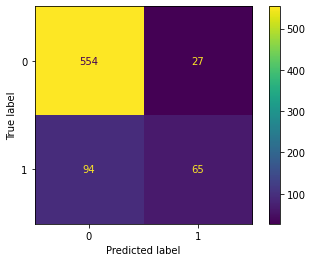

In [112]:
cm = confusion_matrix(y_test, ADA_test, labels=ADA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ADA.classes_)

disp.plot()
plt.show()

### Result `After` Hyperparameter tuning

In [88]:
model = grid_search.best_estimator_

model.fit(X_train, y_train)

model_train = model.predict(X_train)
model_test = model.predict(X_test)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2325
           1       0.78      0.46      0.58       634

    accuracy                           0.86      2959
   macro avg       0.82      0.71      0.75      2959
weighted avg       0.85      0.86      0.84      2959

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       581
           1       0.77      0.46      0.57       159

    accuracy                           0.85       740
   macro avg       0.82      0.71      0.74       740
weighted avg       0.85      0.85      0.84       740



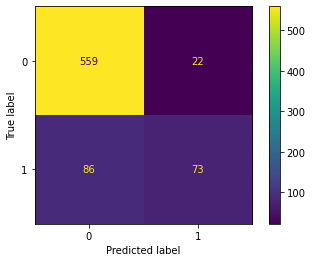

In [113]:
cm = confusion_matrix(y_test, model_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.show()

In this study, researchers will make class 1 (yes) in the default_payment_next_month target column as a positive class or main class as a reference in considering false negatives.
- True Positive (TP) = cases where clients with bad payments are predicted to be really bad

- True Negative (TN) = cases where clients with smooth payments are predicted to have smooth payments

- False Positive (FP) = cases where clients with smooth payments are predicted as clients with bad payments

- False Negative (FN) = cases where clients with bad payments are predicted as clients with smooth payments

In this research, the researcher wants to anticipate and handle the FN case where the actual client is stuck but is predicted to be a client with smooth payments. The reason why this case should receive more attention is that credit card issuers do not provide credit card access to clients who are actually unable to pay their debt obligations, but the issuers instead regard them as clients with smooth payments.
The FN case is very precise in terms of the results of the recall calculation.

Recall Is the ratio of correct positive predictions compared to all data that is positive.

Recall = (TP) / (TP + FN)

- Before to Hyperparameter tuning, the AdaBoost model uses default parameters. The result is `Good Fit` even though the score is `0.41`. The score for small recall in this model is affected by data imbalance in the `default_payment_next_month` target column.
In the AdaBoost model, before hyperparameter tuning, it was able to predict True Positive as many as 65 data from 159 data and predict False Negative as much as 94 data from 159 data.

- After using Hyperparameter Tuning the result remains `Good Fit` and the model recall score increases 0.05 so the result is `0.46`. Based on the confusion_matrix, this model is only able to predict True Positive as many as 73 data from 159 data and predict False Negative as many as 86 data from 159 data.

The conclusion is that the poor performance of the model made is due to imbalance data and you can handle the imbalance data first or you can try to build another model that is more effective.

## 9.Model Inference

In [89]:
inference = wins.transform(inference)
inference

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
91,180000,1,1,1,35,0,0,0,0,0,0,170128,172258,138807,132806,135603,137803,7187,5000,4749,5141,4916,4000,0
325,20000,1,3,2,38,0,0,0,0,0,0,18878,19286,18977,18335,18718,18475,1318,1289,647,669,664,682,0
47,240000,1,1,1,35,0,0,0,0,0,0,188964,183744,168683,155064,148969,148619,8000,6017,6900,5250,5400,6200,0
2848,240000,2,2,2,30,-1,-1,0,-1,-1,-1,4684,18412,16580,416,416,416,18432,1416,16580,416,416,416,1
446,150000,1,2,1,41,0,0,0,0,0,0,19350,20703,10403,10927,11598,13235,2000,3000,1000,1000,2000,2000,0


In [90]:
inf_cat = inference[cat]
inf_cat

,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
91,1,1,1,0,0,0,0,0,0,0
325,1,3,2,0,0,0,0,0,0,0
47,1,1,1,0,0,0,0,0,0,0
2848,2,2,2,-1,-1,0,-1,-1,-1,1
446,1,2,1,0,0,0,0,0,0,0


In [91]:
inference_model = inference[['limit_balance', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']]
inference_model

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
91,180000,0,0,0,0,0,0,0
325,20000,0,0,0,0,0,0,0
47,240000,0,0,0,0,0,0,0
2848,240000,-1,-1,0,-1,-1,-1,1
446,150000,0,0,0,0,0,0,0


In [92]:
num_column = ['limit_balance']

inference_model[num_column]= scaler.transform(inference_model[num_column])
inference_model


,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
91,0.215190,0,0,0,0,0,0,0
325,0.012658,0,0,0,0,0,0,0
47,0.291139,0,0,0,0,0,0,0
2848,0.291139,-1,-1,0,-1,-1,-1,1
446,0.177215,0,0,0,0,0,0,0


In [93]:
X_inf = inference_model.drop('default_payment_next_month', axis=1).copy()

### Result `Before` Hyperparameter tuning

In [94]:
ADA.predict(X_inf)

array([0, 0, 0, 0, 0], dtype=int64)

### Resultf `After` Hyperparameter tuning

In [95]:
model.predict(X_inf)

array([0, 0, 0, 0, 0], dtype=int64)

> At the model inference stage, the model that I use at this stage is the adaboost model which has done hyperparameter tuning, and when new data is entered the model can run and make predictions which means the model can be used and can run in making predictions on new data

## 10.Conlussion

In this study it can be concluded that:
1. clients with smooth payments, which means clients are still able to fulfill their debt payment obligations. The number of clients with smooth payments is 2,325 people
- Clients with bad payments, which means clients are unable to fulfill their debt payment obligations. The number of bad paying clients is 634 people

2. Most credit card users have university-level education

3. In general, credit card users in Taiwan are around the age of 30 to around 40 years old.

4. The number of female clients is 1,800 people and the number of male clients is 1,159 people. The number of female clients is more than the number of male clients.

5. Based on EDA - Modeling, there are several features determined from the feature selection results using a correlation heatmap which will later be used in the modeling stage, along with the features used `limit_balance`, `pay_1`,`pay_2`,` pay_3`,`pay_4`,`pay_5` ,`pay_6` and `default_payment_next_month` as targets

6. In this study there are several models that will be used, namely the model:
> - Logistic Regression
> - SVM
> - Decision Tree Classifier
> - RandomForestClassifier
> - KNN
> - Naive Bayes
> - AdaBoost

7. Determine the best model based on the accuracy mean value and the standard deviation accuracy value so that by cross validation the best model is obtained, namely the `AdaBoost` model with an accuracy mean value of 0.82 and an accuracy Std still close to 0

8. Hyperparameter tuning in this study seeks the highest scoring recall results so that the model is able to anticipate cases of clients that are jammed but are predicted as clients with smooth payments.
> 'algorithm': 'SAMME',
> 'base_estimator': DecisionTreeClassifier(max_depth=20),
>'learning_rate': 0.5,
> 'n_estimators': 150}

9. Conclusion based on the result model before and after using hyperparameter tuning
- Before to Hyperparameter tuning, the AdaBoost model uses default parameters. The result is `Good Fit` even though the score is `0.41`. The score for small recall in this model is affected by data imbalance in the `default_payment_next_month` target column.
In the AdaBoost model, before hyperparameter tuning, it was able to predict True Positive as many as 65 data from 159 data and predict False Negative as much as 94 data from 159 data.

- After using Hyperparameter Tuning the result remains `Good Fit` and the model recall score increases 0.05 so the result is `0.46`. Based on the confusion_matrix, this model is only able to predict True Positive as many as 73 data from 159 data and predict False Negative as many as 86 data from 159 data.

## Conceptual Problems
Jawab pertanyaan berikut:

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

Answer :
1. Criterion : parameter to separate attributes. For each criterion that can be selected, it must be able to optimize the split value from the decision tree. an example of a criterion that can be selected is accuracy.
> Accuracy is this criterion selecting the attributes to be separated that can maximize the accuracy of the entire tree.
> Entropy : this criterion is used to measure impurities in certain attributes

2. tree pruning, namely identifying and removing branches that are not needed in the tree that has been formed. This is because the constructed decision tree can be large in size, so it can be simplified by pruning based on the confidence level. Tree pruning is done in addition to reducing the size of the tree, it also aims to reduce the prediction error rate in new cases from the results of dividing by dividing and conquering. PruningThere are two approaches, namely:
- Pre-pruning ie stopping the construction of a subtree earlier (by deciding not to further partition the training data). When it suddenly stops, the node turns into a leaf (end node). This end node becomes the class that occurs most frequently among the sample subsets.
- Post-pruning, namely simplifying the tree by removing some of the subtree branches after the tree has been built. The node that is rarely cut will be the leaf (end node) with the most frequently appearing class.

3. It is recommended to choose k values ​​that are odd numbers to avoid ties in classification, meaning a minimum value of k = 3. The cross validation strategy can also be used to help us choose the optimal k for the dataset we have.

4. Cross Validation systematically creates and evaluates several models on several subsets of the data set. It is used to assess the evaluation of machine learning models by training several models on the available training data subset and evaluating them on the test data subset. By using cross validation, there is a high probability of detecting overfit easily. To perform Cross Validation, we must create a fixed number of data folds (partitions) and then perform analysis on each fold. Then average the overall error estimates.

5. > Accuracy = Is the ratio of correct predictions (positive and negative) to the entire data. Accuracy is not suitable to be used as a reference for imbalance data.
- Accuracy = (TP + TN) /(TP + TN + FP + FN)

> Precission = Is the ratio of positive correct predictions compared to the overall positive predicted results. Precision is a matrix that describes how large the number of correct predictions is. Precission usually focuses mainly on False positive cases
- Precision = (TP) / (TP + FP)

> Recall = Represents the ratio of correct positive predictions compared to all correct positive data. Recall is a matrix that describes the number of positive predicted positive data. The main focus is to handle False Negative cases.
- Recall = (TP) / (TP + FN)

> F1 Score = is a comparison of the average precision and recall that is weighted. It is very good to be used as a reference if Precision and Recall are in balance.
- F1 Score = (2 x Precision x Recall) / (Precision + Recall)
